In [1]:
from google.colab import files
src = list(files.upload().values())[0]
open('helper_functions.py','wb').write(src)
import helper_functions

Saving helper_functions.py to helper_functions.py


In [2]:
import helper_functions

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

!pip install transformers
from transformers import pipeline
from helper_functions import *

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 5.3 MB/s 
     |████████████████████████████████| 163 kB 51.1 MB/s 
     |████████████████████████████████| 7.6 MB 44.3 MB/s 


In [4]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/aggregated_handlabeled.csv',index_col = [0])

In [6]:
df

,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count,sentiment,cost,ease of use,effective,efficient
4883,Garden,55829,AMDRO Ant Block Home Perimeter Ant Bait 24oz,https://www.lowes.com/pd/AMDRO-Ant-Block-24-oz...,Lowes,Amdro,1000044709,1000044709,No,2021-06-03T00:00:00,2021,6,22,Problem solver,Great product. We had huge problem with ants e...,organic reviews,9.47,5,0,0,0,No,great product. we had huge problem with ants e...,6/3/2021,23,positive,NaN,NaN,1.0,1.0
3551,Garden,33176,Pennington Wild Bird Food,http://www.homedepot.com/p/t/312026386,Homedepot,Pennington Bird,312026386,312026384,Yes,2021-06-09T00:00:00,2021,6,23,The seeds mix is good...,The seeds mix is good,organic reviews,12.98,2,0,0,0,No,the seeds mix is good,6/9/2021,5,positive,NaN,NaN,1.0,NaN
2545,Garden,22333,Centipede Seed With Mulch 5lb bag,http://www.homedepot.com/p/t/100598598,Homedepot,Pennington Grass,100598598,100598598,Yes,2021-07-09T00:00:00,2021,7,27,This product was easy spread and have covered ...,This product was easy spread and have covered ...,organic reviews,39.64,5,0,0,0,No,this product was easy spread and have covered ...,7/9/2021,19,positive,NaN,1.0,1.0,1.0
614,Garden,4312,Sevin Lawn Insect Granules 10 lb.,https://www.amazon.com/Sevin-Lawn-Insect-Granu...,Amazon,GardenTech,B000RUAR0G,B000RUAR0G,No,2021-07-03T00:00:00,2021,7,26,Use as directed,"When I first purchased this bag, bugs kept eat...",organic reviews,19.00,5,0,0,1,No,"when i first purchased this bag, bugs kept eat...",7/3/2021,64,positive,NaN,NaN,1.0,NaN
19,Garden,244,AMDRO Fire Ant Bait 2lb,https://www.amazon.com/dp/B002FYMTB2,Amazon,Amdro,B002FYMTB2,B002FYMTB2,No,2021-06-13T00:00:00,2021,6,23,Very Effective for Harvester Ants,Actually kills Harvester Ants! We have struggl...,organic reviews,20.59,5,0,0,0,No,actually kills harvester ants! we have struggl...,6/13/2021,37,positive,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,Garden,6333,Lawn Booster Sun & Shade 9.6lb bag,https://www.amazon.com/dp/B084NMGHK7,Amazon,Pennington Grass,B084NMGHK7,B084NMGHK7,No,2021-06-30T00:00:00,2021,6,26,Great,Its is good,organic reviews,15.88,3,0,0,0,No,its is good,6/30/2021,3,NaN,NaN,NaN,NaN,NaN
9851,Garden,70548,Pennington Wild Bird Food Blend Bucket,http://www.homedepot.com/p/312026384,Homedepot,Pennington Bird,312026398,312026384,Yes,2021-12-17T00:00:00,2021,12,50,Poor quality,The variety of seed is pretty poor. Overloaded...,organic reviews,22.98,2,0,0,1,No,the variety of seed is pretty poor. overloaded...,12/17/2021,22,NaN,NaN,NaN,NaN,NaN
23479,Garden,135531,"Pennington Smart Patch Bermudagrass Mix, 5 lb Jug",https://www.lowes.com/pd/Pennington-Smart-Patc...,Lowes,Pennington Grass,5005478639,5005478639,No,2022-05-12T00:00:00,2022,5,19,Beautiful Grass,[This review was collected as part of a promot...,syndicated reviews,11.98,5,0,0,0,Yes,[this review was collected as part of a promot...,5/12/2022,49,NaN,NaN,NaN,NaN,NaN
15375,Garden,90659,Pennington Ready-to-Use Hummingbird Food 64oz,https://www.walmart.com//ip/Pennington-Ready-t...,Walmart,Pennington Bird,471014069,471014069,No,2022-04-16T00:00:00,2022,4,15,Easy buy.,I like that I can buy a pre made formula to fe...,organic reviews,5.74,5,0,0,0,No,i like that i can buy a pre made formula to fe...,4/16/2022,77,NaN,NaN,NaN,NaN,NaN


In [7]:
#replace NaN in label columns with 0
columns = ['cost','ease of use', 'effective', 'efficient']

for column in columns:
    df[column] = df[column].replace(np.nan, int(0))

In [8]:
df

,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count,sentiment,cost,ease of use,effective,efficient
4883,Garden,55829,AMDRO Ant Block Home Perimeter Ant Bait 24oz,https://www.lowes.com/pd/AMDRO-Ant-Block-24-oz...,Lowes,Amdro,1000044709,1000044709,No,2021-06-03T00:00:00,2021,6,22,Problem solver,Great product. We had huge problem with ants e...,organic reviews,9.47,5,0,0,0,No,great product. we had huge problem with ants e...,6/3/2021,23,positive,0.0,0.0,1.0,1.0
3551,Garden,33176,Pennington Wild Bird Food,http://www.homedepot.com/p/t/312026386,Homedepot,Pennington Bird,312026386,312026384,Yes,2021-06-09T00:00:00,2021,6,23,The seeds mix is good...,The seeds mix is good,organic reviews,12.98,2,0,0,0,No,the seeds mix is good,6/9/2021,5,positive,0.0,0.0,1.0,0.0
2545,Garden,22333,Centipede Seed With Mulch 5lb bag,http://www.homedepot.com/p/t/100598598,Homedepot,Pennington Grass,100598598,100598598,Yes,2021-07-09T00:00:00,2021,7,27,This product was easy spread and have covered ...,This product was easy spread and have covered ...,organic reviews,39.64,5,0,0,0,No,this product was easy spread and have covered ...,7/9/2021,19,positive,0.0,1.0,1.0,1.0
614,Garden,4312,Sevin Lawn Insect Granules 10 lb.,https://www.amazon.com/Sevin-Lawn-Insect-Granu...,Amazon,GardenTech,B000RUAR0G,B000RUAR0G,No,2021-07-03T00:00:00,2021,7,26,Use as directed,"When I first purchased this bag, bugs kept eat...",organic reviews,19.00,5,0,0,1,No,"when i first purchased this bag, bugs kept eat...",7/3/2021,64,positive,0.0,0.0,1.0,0.0
19,Garden,244,AMDRO Fire Ant Bait 2lb,https://www.amazon.com/dp/B002FYMTB2,Amazon,Amdro,B002FYMTB2,B002FYMTB2,No,2021-06-13T00:00:00,2021,6,23,Very Effective for Harvester Ants,Actually kills Harvester Ants! We have struggl...,organic reviews,20.59,5,0,0,0,No,actually kills harvester ants! we have struggl...,6/13/2021,37,positive,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,Garden,6333,Lawn Booster Sun & Shade 9.6lb bag,https://www.amazon.com/dp/B084NMGHK7,Amazon,Pennington Grass,B084NMGHK7,B084NMGHK7,No,2021-06-30T00:00:00,2021,6,26,Great,Its is good,organic reviews,15.88,3,0,0,0,No,its is good,6/30/2021,3,NaN,0.0,0.0,0.0,0.0
9851,Garden,70548,Pennington Wild Bird Food Blend Bucket,http://www.homedepot.com/p/312026384,Homedepot,Pennington Bird,312026398,312026384,Yes,2021-12-17T00:00:00,2021,12,50,Poor quality,The variety of seed is pretty poor. Overloaded...,organic reviews,22.98,2,0,0,1,No,the variety of seed is pretty poor. overloaded...,12/17/2021,22,NaN,0.0,0.0,0.0,0.0
23479,Garden,135531,"Pennington Smart Patch Bermudagrass Mix, 5 lb Jug",https://www.lowes.com/pd/Pennington-Smart-Patc...,Lowes,Pennington Grass,5005478639,5005478639,No,2022-05-12T00:00:00,2022,5,19,Beautiful Grass,[This review was collected as part of a promot...,syndicated reviews,11.98,5,0,0,0,Yes,[this review was collected as part of a promot...,5/12/2022,49,NaN,0.0,0.0,0.0,0.0
15375,Garden,90659,Pennington Ready-to-Use Hummingbird Food 64oz,https://www.walmart.com//ip/Pennington-Ready-t...,Walmart,Pennington Bird,471014069,471014069,No,2022-04-16T00:00:00,2022,4,15,Easy buy.,I like that I can buy a pre made formula to fe...,organic reviews,5.74,5,0,0,0,No,i like that i can buy a pre made formula to fe...,4/16/2022,77,NaN,0.0,0.0,0.0,0.0


**Sentiment Analysis**

In [9]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Downloading:   0%|          | 0.00/929 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [10]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

sentiment = [None] * len(df)
index = -1
for sentence in df['review_lower']:
    index+=1
    if(index%20 == 0):
        print(index)

    result = sentiment_pipeline(sentence[:512])[0]
    sentiment[index] = result['label']
df['sentiment_m'] = sentiment

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380


**Zero-Shot Classifier**

In [11]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

Downloading:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [12]:
type = ['cost', 'efficient', 'effective', 'ease of use']

In [13]:
#setting empty values for the columns
index = -1
for label in type:
    df[label + '_m'] = -1

for j in range(len(df)):
    #counter for progress/debugging
    index+=1
    if(index%20 == 0): 
        print(index)
        
    #running the classifier on the column    
    res = classifier(
        df.iloc[j]['review_lower'],
        candidate_labels = type,
        multi_label = True
    )
    #setting the column values according to the output from the classifier ("_m" = multiclass)
    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380


In [14]:
# create a "max" column for metric purposes
df['max'] = df[['cost_m', 'efficient_m', 'effective_m', 'ease of use_m']].max(axis=1)
df.head(3)

,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count,sentiment,cost,ease of use,effective,efficient,sentiment_m,cost_m,efficient_m,effective_m,ease of use_m,max
4883,Garden,55829,AMDRO Ant Block Home Perimeter Ant Bait 24oz,https://www.lowes.com/pd/AMDRO-Ant-Block-24-oz...,Lowes,Amdro,1000044709,1000044709,No,2021-06-03T00:00:00,2021,6,22,Problem solver,Great product. We had huge problem with ants e...,organic reviews,9.47,5,0,0,0,No,great product. we had huge problem with ants e...,6/3/2021,23,positive,0.0,0.0,1.0,1.0,Positive,0.498742,0.980484,0.998226,0.773456,0.998226
3551,Garden,33176,Pennington Wild Bird Food,http://www.homedepot.com/p/t/312026386,Homedepot,Pennington Bird,312026386,312026384,Yes,2021-06-09T00:00:00,2021,6,23,The seeds mix is good...,The seeds mix is good,organic reviews,12.98,2,0,0,0,No,the seeds mix is good,6/9/2021,5,positive,0.0,0.0,1.0,0.0,Positive,0.003480,0.951615,0.997619,0.347957,0.997619
2545,Garden,22333,Centipede Seed With Mulch 5lb bag,http://www.homedepot.com/p/t/100598598,Homedepot,Pennington Grass,100598598,100598598,Yes,2021-07-09T00:00:00,2021,7,27,This product was easy spread and have covered ...,This product was easy spread and have covered ...,organic reviews,39.64,5,0,0,0,No,this product was easy spread and have covered ...,7/9/2021,19,positive,0.0,1.0,1.0,1.0,Positive,0.375175,0.992700,0.997839,0.993937,0.997839


**Insights**

In [15]:

#assign the max to its aligned type
align_list=[]
j = 0
for i in range(len(df)):
  for t in type:
    if df[t+'_m'].iloc[i] == df['max'].iloc[i]:
      # print(i)
      # print(df[t+'_m'].iloc[i])
      align_list.append(t)

df['align_type']=align_list

In [16]:
# Create Pivot table for the Heatmap
table_count = pd.pivot_table(df, values='max', index=['sentiment'], columns=['align_type'], aggfunc='count', margins=True, 
                       dropna=True, fill_value=0)
table_count

align_type,cost,ease of use,effective,efficient,All
sentiment,,,,,
negative,19,2,4,0,25
neutral,3,2,7,0,12
positive,0,5,57,2,64
All,22,9,68,2,101


In [17]:
#count the percentage
table2 = table_count.div( table_count.iloc[-1,:], axis=1 ).applymap('{:.0%}'.format)
table2=table2.drop('All').drop(labels='All', axis=1)
table2

align_type,cost,ease of use,effective,efficient
sentiment,,,,
negative,86%,22%,6%,0%
neutral,14%,22%,10%,0%
positive,0%,56%,84%,100%


In [18]:
#Drop "ALL" column and row
table_count=table_count.drop('All').drop(labels='All', axis=1)

#reshape results
results=np.asarray(table2)

#check results
results

array([['86%', '22%', '6%', '0%'],
       ['14%', '22%', '10%', '0%'],
       ['0%', '56%', '84%', '100%']], dtype=object)

<Figure size 864x360 with 0 Axes>

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

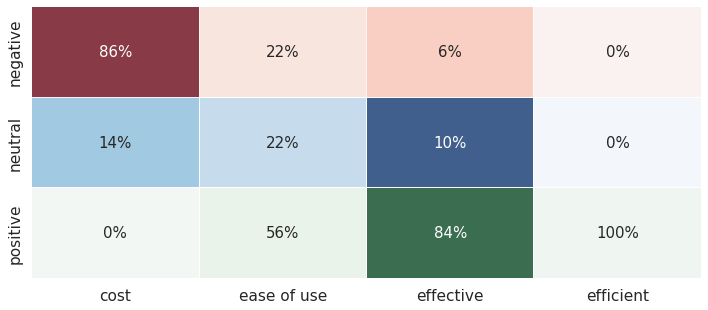

In [19]:
# Heatmap

plt.figure(figsize=(12, 5))
sns.set(font_scale=1.4)
# Reds
data1 = table_count.copy()
data1.loc['negative'] = float('nan')
data1.loc['neutral'] = float('nan')
ax=sns.heatmap(data1, annot=results, cmap="Greens",alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Blue
data2 = table_count.copy()
data2.loc['negative'] = float('nan')
data2.loc['positive'] = float('nan')
ax=sns.heatmap(data2, annot=results, cmap="Blues", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")
# Greens
data3 = table_count.copy()
data3.loc['positive'] = float('nan')
data3.loc['neutral'] = float('nan')
ax=sns.heatmap(data3, annot=results, cmap="Reds", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

**For 5 start rating reviews**

In [20]:
df_5 = df[df['rating'] == 5]

Text(0.5, 1.0, 'Top 10 Products with 5 Ratings')

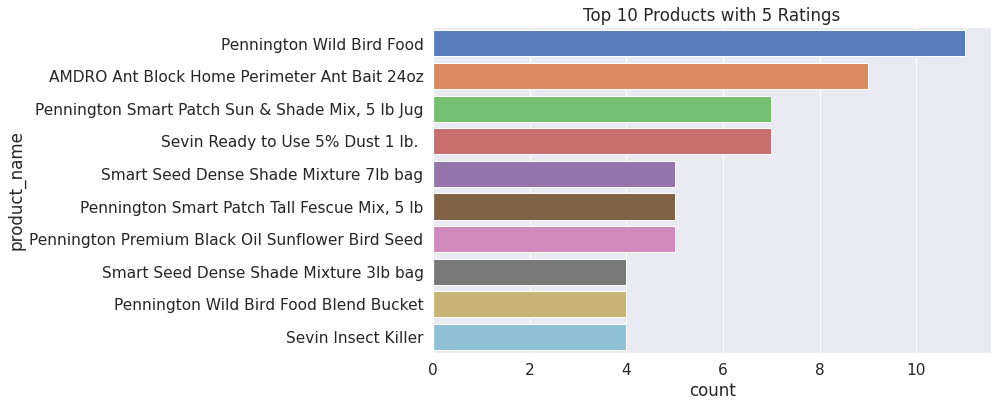

In [21]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Top 10 Products with 5 Ratings');
sns.countplot(y = 'product_name', data = df_5, order = df_5['product_name'].value_counts()[0:10].index, palette = "muted")
#plt.savefig('figs/negative_homedepot', bbox_inches = 'tight');

**N-Gram**

In [22]:
from collections import defaultdict
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [23]:
## Get the bar chart from 5 rated reviews ##
freq_dict = defaultdict(int)
for sent in df_5["review_lower"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(10), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



**Heatmap**

In [24]:
# Create Pivot table for the Heatmap
table_count = pd.pivot_table(df_5, values='max', index=['sentiment'], columns=['align_type'], aggfunc='count', margins=True, 
                       dropna=True, fill_value=0)

#count the percentage
table2 = table_count.div( table_count.iloc[-1,:], axis=1 ).applymap('{:.0%}'.format)
table2=table2.drop('All').drop(labels='All', axis=1)


#Drop "ALL" column and row
table_count=table_count.drop('All').drop(labels='All', axis=1)

#reshape results
results=np.asarray(table2)

<Figure size 864x360 with 0 Axes>

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

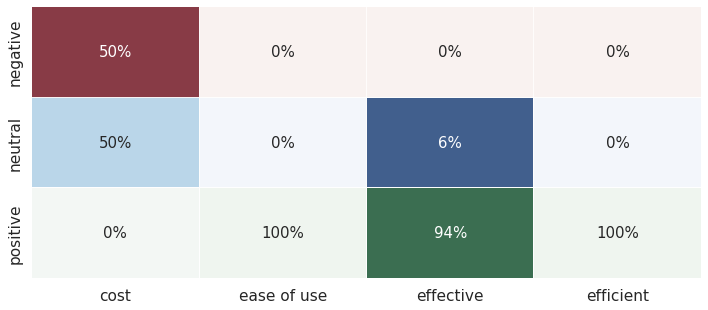

In [25]:
# Heatmap

plt.figure(figsize=(12, 5))
sns.set(font_scale=1.4)
# Reds
data1 = table_count.copy()
data1.loc['negative'] = float('nan')
data1.loc['neutral'] = float('nan')
ax=sns.heatmap(data1, annot=results, cmap="Greens",alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Blue
data2 = table_count.copy()
data2.loc['negative'] = float('nan')
data2.loc['positive'] = float('nan')
ax=sns.heatmap(data2, annot=results, cmap="Blues", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")
# Greens
data3 = table_count.copy()
data3.loc['positive'] = float('nan')
data3.loc['neutral'] = float('nan')
ax=sns.heatmap(data3, annot=results, cmap="Reds", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

**For 1 Star Rated Reviews**

In [26]:
df_1 = df[df['rating'] == 1]

Text(0.5, 1.0, 'Top 10 Products with 1 Ratings')

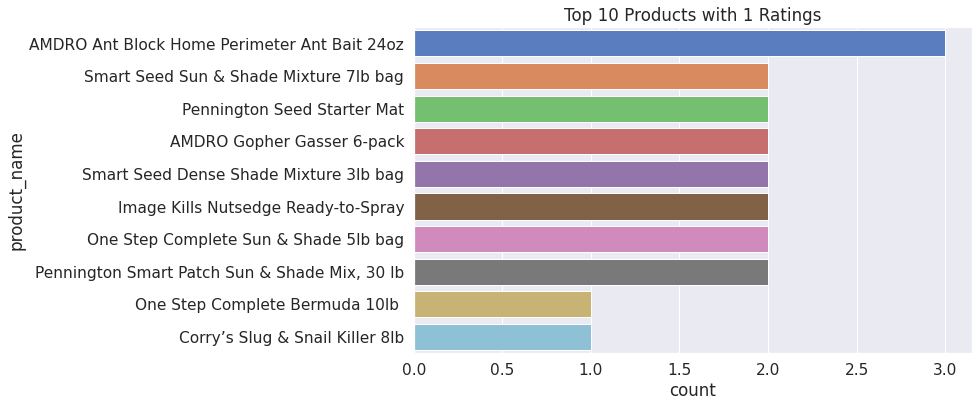

In [27]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Top 10 Products with 1 Ratings');
sns.countplot(y = 'product_name', data = df_1, order = df_1['product_name'].value_counts()[0:10].index, palette = "muted")
#plt.savefig('figs/negative_homedepot', bbox_inches = 'tight');

In [28]:
## Get the bar chart from 1 rated reviews ##
freq_dict = defaultdict(int)
for sent in df_1["review_lower"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(10), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [66]:
# Create Pivot table for the Heatmap
table_count = pd.pivot_table(df_1, values='max', index=['sentiment'], columns=['align_type'], aggfunc='count', margins=True, 
                       dropna=True, fill_value=0)

#count the percentage
table2 = table_count.div( table_count.iloc[-1,:], axis=1 ).applymap('{:.0%}'.format)
table2=table2.drop('All').drop(labels='All', axis=1)


#Drop "ALL" column and row
table_count=table_count.drop('All').drop(labels='All', axis=1)

index = ['neutral','positive']
temp_df = pd.DataFrame(data= [{'cost':0,
                                'ease of use':0,
                                'effective':0,
                                'efficient':0}],
                                columns=['cost','ease of use','effective','efficient'], index=index)
table_count=pd.concat([table_count,temp_df], axis = 0)
table2=pd.concat([table2, temp_df], axis=0)
#reshape results
results=np.asarray(table2)

<Figure size 864x360 with 0 Axes>

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

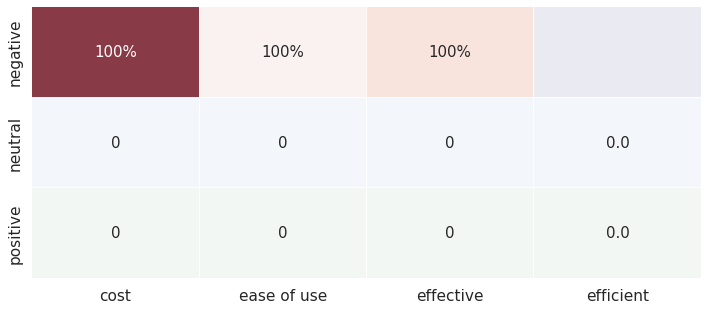

In [67]:
# Heatmap

plt.figure(figsize=(12, 5))
sns.set(font_scale=1.4)
# Reds
data1 = table_count.copy()
data1.loc['negative'] = float('nan')
data1.loc['neutral'] = float('nan')
ax=sns.heatmap(data1, annot=results, cmap="Greens",alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Blue
data2 = table_count.copy()
data2.loc['negative'] = float('nan')
data2.loc['positive'] = float('nan')
ax=sns.heatmap(data2, annot=results, cmap="Blues", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")
# Greens
data3 = table_count.copy()
data3.loc['positive'] = float('nan')
data3.loc['neutral'] = float('nan')
ax=sns.heatmap(data3, annot=results, cmap="Reds", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

In [72]:
df.to_csv('insightinsight_AggregatedData.csv')